In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### scikit-learn 모듈
- Data Cleansing & Feature Engineering
  - `sklearn.preprocessing`: 데이터 전처리 (인코딩, 정규화 등)
  - `sklearn.feature_selection`: feature 선택
  - `sklearn.feature_extraction`: feature 추출 (이미지, 텍스트로 부터 추출)
- Model Evaluation
  - `sklearn.model_selection`: 데이터 분리, 검증 및 모델 튜닝
  - `sklearn.metrics`: 성능 평가
- Supervised Learning Algorithm
  - `sklearn.linear_model`: 선형 모델
  - `sklearn.svm`: 서포트 벡터 머신
  - `sklearn.tree`: 의사결정나무
  - `sklearn.ensemble`: 앙상블 알고리즘
- Unsupervised Learning Algorithm
  - `sklearn.clsuter`: 군집 분석
  - `sklearn.decomposition`: 차원 축소
- Utility&Dataset
  - `sklearn.pipeline`: 워크플로우 효율화
  - `sklearn.datasets`: 예제 데이터셋

### 데이터 불러오기
```python
train = pd.read_csv('train.csv')
```

#### feature
- `pclass`: 자리 등급 (1등석, 2등석, 3등석)
- `name`: 승객 이름
- `sex`: 승객 성별
- `age`: 승객 나이
- `sibsp`: 동승한 자매/배우자 수
- `parch`: 동승한 부모/자식 수
- `ticket`: 티켓 번호
- `fare`: 승객 요금
- `cabin`: 방 호수
- `embarked`: 탑승지
- ~`boat`: 탈출한 보트 번호~ <font color='darkgreen'>: target과 직접적인 연관이 있으므로 제외</font>
- ~`body`: 사망자 확인 번호~ : <font color='darkgreen'>target과 직접적인 연관이 있으므로 제외</font>
- `home.dest`: 고향/목적지

#### target
- `survived`: 생존 여부

In [164]:
# 타이타닉 생존자 데이터
from sklearn.datasets import fetch_openml

In [165]:
data = fetch_openml('titanic', version=1)

In [166]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [170]:
X = data.data.drop(columns=['boat', 'body','name'])
y = data.target

In [171]:
display(X.head(3))
display(y.head(3))

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1.0,female,29.0000,0.0,0.0,24160,211.3375,B5,S,"St Louis, MO"
1,1.0,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1.0,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


0    1
1    1
2    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

### 데이터 분리

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

### EDA(탐색적 데이터 분석)

In [175]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 501 to 684
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     916 non-null    object  
 1   sex        916 non-null    category
 2   age        916 non-null    float64 
 3   sibsp      916 non-null    float64 
 4   parch      916 non-null    float64 
 5   ticket     916 non-null    int64   
 6   fare       0 non-null      float64 
 7   cabin      916 non-null    int64   
 8   embarked   916 non-null    category
 9   home.dest  916 non-null    int64   
 10  나이대        916 non-null    int64   
dtypes: category(2), float64(4), int64(4), object(1)
memory usage: 73.6+ KB


C:\Users\miniw\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\miniw\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\miniw\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


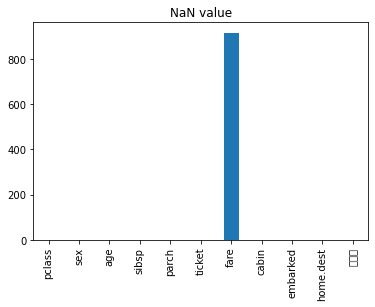

In [176]:
X_train.isna().sum().plot.bar()
plt.title('NaN value')
plt.show()

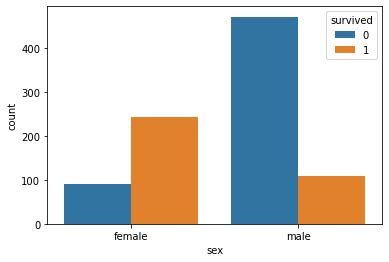

In [138]:
d = pd.concat([X_train.sex, y_train], axis=1)
sns.countplot(data=d, x='sex', hue='survived')
plt.show()

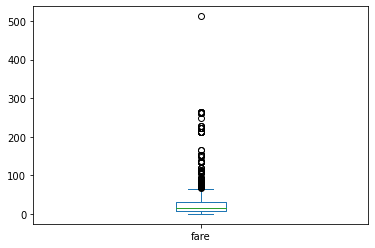

In [139]:
X_train.fare.plot.box()
plt.show()

### 데이터 전처리
검증, 평가 데이터셋에도 **"동일"**한 전처리를 수행해줘야 함

이상치 처리

In [140]:
upper = X_train.fare.quantile(.25) + 1.5*(X_train.fare.quantile(.75) - X_train.fare.quantile(.25))
print(upper)
#상한값 설정

42.9646


In [141]:
X_train.fare = X_train.fare.clip(upper=upper)
#상한값 이사의 것들은 모두 상한값으로 변경

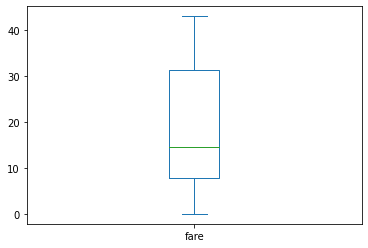

In [142]:
X_train.fare.plot.box()
plt.show()

In [143]:
X_test.fare = X_test.fare.clip(upper=upper)

결측값 처리

In [159]:
# mean -> 평균, mode -> 최빈값
# fillna -> 결측값 대체 함수
X_train['age'] = X_train.age.fillna(X_train.age.mean())
X_train['cabin'] = X_train.cabin.fillna(X_train.cabin.mode()[0])
X_train['embarked'] = X_train.embarked.fillna(X_train.embarked.mode()[0])
X_train['home.dest'] = X_train['home.dest'].fillna('결측치')
X_train['pclass'] = X_train['pclass'].round

In [160]:
X_test['age'] = X_test.age.fillna(X_train.age.mean())
X_test['fare'] = X_test.fare.fillna(X_train.fare.mean())
X_test['cabin'] = X_test.cabin.fillna(X_train.cabin.mode()[0])
X_test['embarked'] = X_test.embarked.fillna(X_train.embarked.mode()[0])
X_test['home.dest'] = X_test['home.dest'].fillna('결측치')
X_test['pclass'] = X_test['pclass'].round()

범주형 변수 처리

In [161]:
X_train.sex = X_train.sex.replace(['male', 'female'], [0, 1])
X_test.sex = X_test.sex.replace(['male', 'female'], [0, 1])

value2idx = {x:i for i, x in enumerate(X_train.ticket.unique())}
X_train['ticket'] = X_train.ticket.map(lambda x: value2idx[x])
X_test['ticket'] = X_test.ticket.map(lambda x: value2idx.get(x,-1))

value2idx = {x:i for i, x in enumerate(X_train.cabin.unique())}
X_train['cabin'] = X_train.cabin.map(lambda x: value2idx[x])
X_test['cabin'] = X_test.cabin.map(lambda x: value2idx.get(x, -1))

value2idx = {x:i for i, x in enumerate(X_train.embarked.cat.categories)}
X_train['embarked'] = X_train.embarked.map(lambda x: value2idx[x])
X_test['embarked'] = X_test.embarked.map(lambda x: value2idx.get(x, -1))

value2idx = {x:i for i, x in enumerate(X_train['home.dest'].unique())}
X_train['home.dest'] = X_train['home.dest'].map(lambda x: value2idx[x])
X_test['home.dest'] = X_test['home.dest'].map(lambda x: value2idx.get(x, -1))

In [162]:
# name열 삭제
X_train = X_train.drop(columns='name')
X_test = X_test.drop(columns='name')

KeyError: "['name'] not found in axis"

### feature 생성

In [152]:
# feature 생성 예시
X_train['나이대'] = X_train.age.map(lambda x: str(x)[0]+'0대')

value2idx = {x:i for i, x in enumerate(X_train.나이대.unique())}
X_train['나이대'] = X_train.나이대.map(lambda x: value2idx[x])

X_test['나이대'] = X_test.age.map(lambda x: str(x)[0]+'0대')

value2idx = {x:i for i, x in enumerate(X_test.나이대.unique())}
X_test['나이대'] = X_test.나이대.map(lambda x: value2idx[x])

In [153]:
### 과제: feature를 생성하여 모델의 성능을 높이시오.

In [156]:
X_train

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,나이대
501,2.0,1,13.000000,0.0,1.0,0,NaN,0,2,0,0
588,2.0,1,4.000000,1.0,1.0,1,NaN,0,2,1,1
402,2.0,1,30.000000,1.0,0.0,2,NaN,0,0,2,2
1193,3.0,0,30.231444,0.0,0.0,3,NaN,0,1,3,2
686,3.0,1,22.000000,0.0,0.0,4,NaN,0,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...
763,3.0,1,0.166700,1.0,2.0,98,NaN,0,2,51,4
835,3.0,0,30.231444,0.0,0.0,696,NaN,0,2,3,2
1216,3.0,1,30.231444,0.0,0.0,697,NaN,0,1,3,2
559,2.0,1,20.000000,0.0,0.0,296,NaN,0,2,159,3


### 모델 학습

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train) # 모델 학습

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### 모델 평가

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [26]:
model.predict(X_test) # 클래스 예측

array(['0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0',
       '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1',
       '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0',
       '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1',
       '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0',
       '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0',
       '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1

In [27]:
model.predict_proba(X_test) # 각 클래스의 확률 예측

array([[0.73, 0.27],
       [0.02, 0.98],
       [0.89, 0.11],
       [0.99, 0.01],
       [0.88, 0.12],
       [0.3 , 0.7 ],
       [0.58, 0.42],
       [0.46, 0.54],
       [0.65, 0.35],
       [0.85, 0.15],
       [0.69, 0.31],
       [0.6 , 0.4 ],
       [0.53, 0.47],
       [0.55, 0.45],
       [0.03, 0.97],
       [0.74, 0.26],
       [0.13, 0.87],
       [0.48, 0.52],
       [0.21, 0.79],
       [0.8 , 0.2 ],
       [0.62, 0.38],
       [0.92, 0.08],
       [0.75, 0.25],
       [0.06, 0.94],
       [0.53, 0.47],
       [0.12, 0.88],
       [0.58, 0.42],
       [0.79, 0.21],
       [0.95, 0.05],
       [0.4 , 0.6 ],
       [0.48, 0.52],
       [0.02, 0.98],
       [0.09, 0.91],
       [0.57, 0.43],
       [0.14, 0.86],
       [0.76, 0.24],
       [0.77, 0.23],
       [0.79, 0.21],
       [0.8 , 0.2 ],
       [0.73, 0.27],
       [0.81, 0.19],
       [0.6 , 0.4 ],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.48, 0.52],
       [0.97, 0.03],
       [0.8 , 0.2 ],
       [0.12,

In [28]:
preds = model.predict(X_test)
acc_score = accuracy_score(y_test, preds) # 성능 측정 (정확도)

probas = model.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, probas) # 성능 측정 (ROC_AUC)

print('Accuracy:\t', acc_score)
print('ROC_AUC:\t', auc_score)

Accuracy:	 0.8015267175572519
ROC_AUC:	 0.8430673082241027
